# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [5]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [7]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

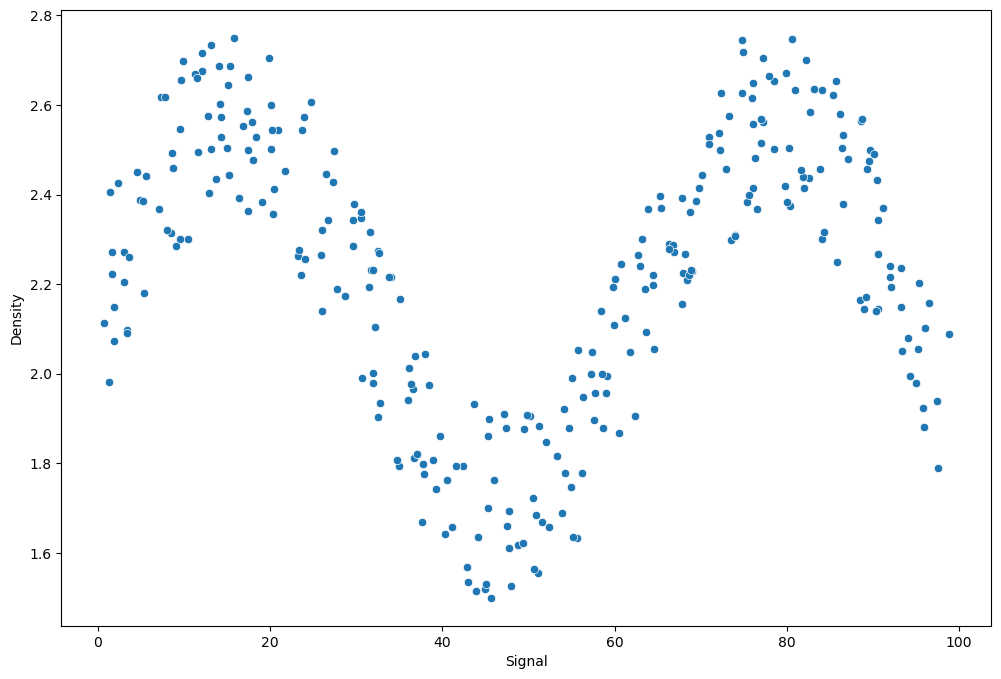

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Signal', y='Density')

## Train | Test Split

In [9]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

---

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_preds = lr_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

What does the fit look like?

In [18]:
signal_range = np.arange(0, 100)

In [19]:
lr_output = lr_model.predict(signal_range.reshape(-1, 1))

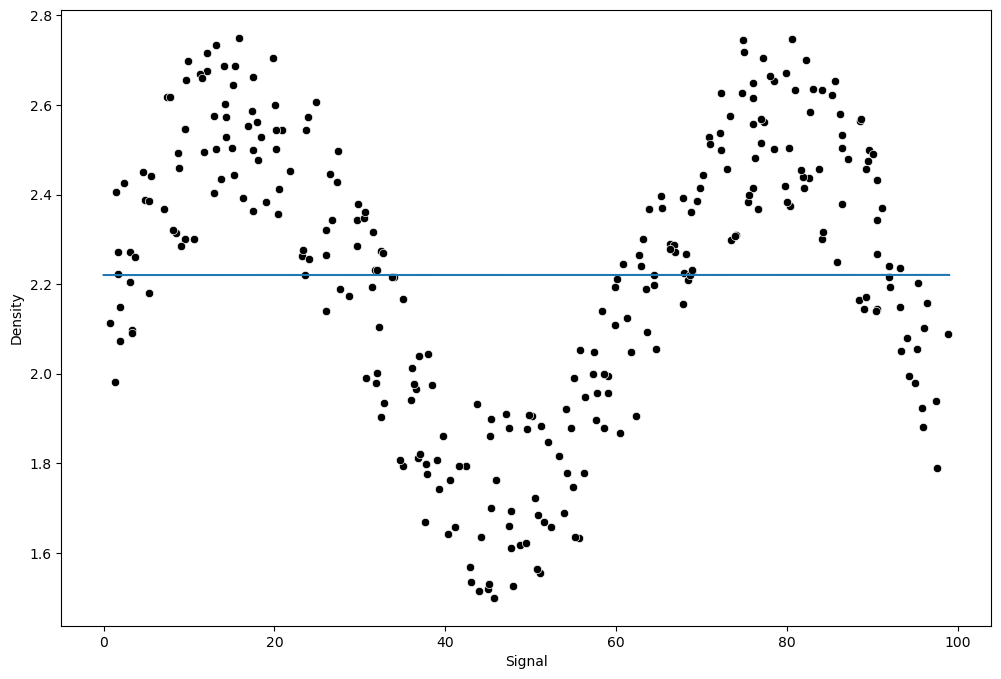

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Signal', y='Density', color='black')
plt.plot(signal_range, lr_output)

---

## Function to Help Run Models

In [23]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE: {rmse}')
    
    # Plot results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')
    plt.plot(signal_range, output)

In [25]:
model = LinearRegression()

RMSE: 0.2570051996584629


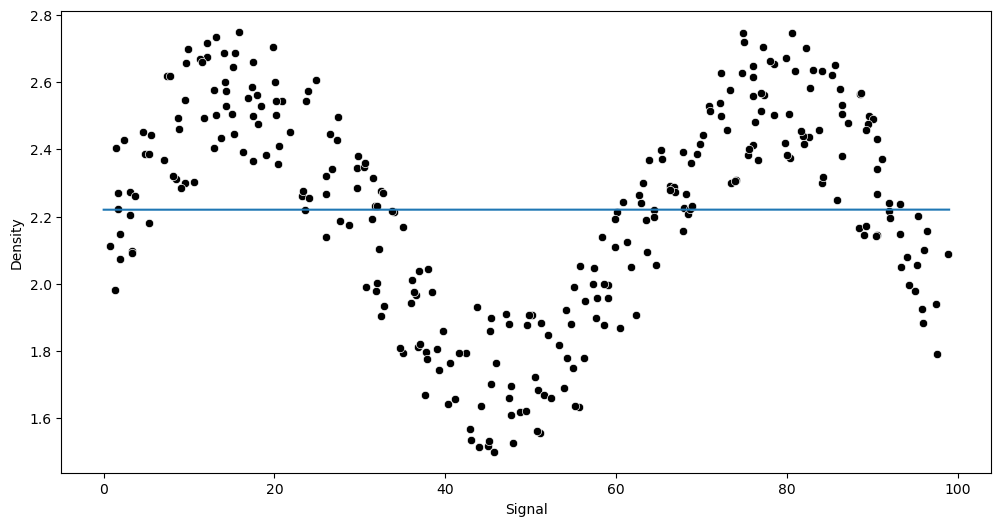

In [26]:
run_model(model, X_train, y_train, X_test, y_test)

---

# Polynomial Regression

## Pipeline for Poly Orders

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())

RMSE: 0.28173095637255835


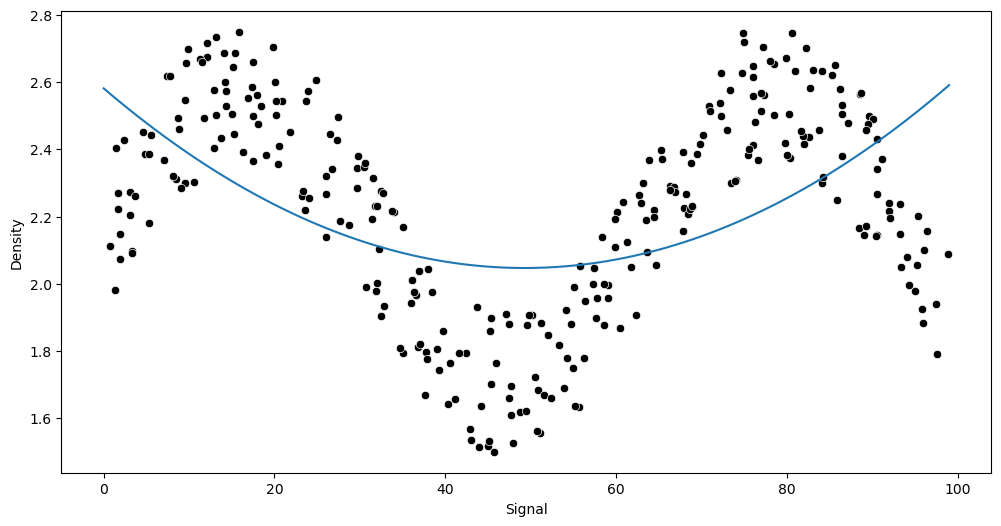

In [31]:
run_model(pipe, X_train, y_train, X_test, y_test)

## Comparing Various Polynomial Orders

RMSE: 0.14035228495977833


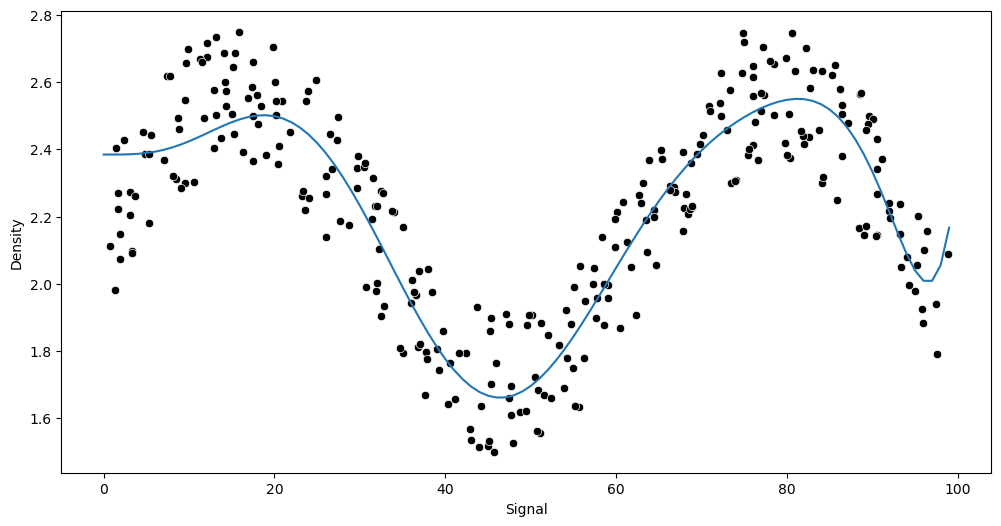

In [32]:
pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

---

# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
RMSE: 0.13730685016923647
RMSE: 0.13277855732740926


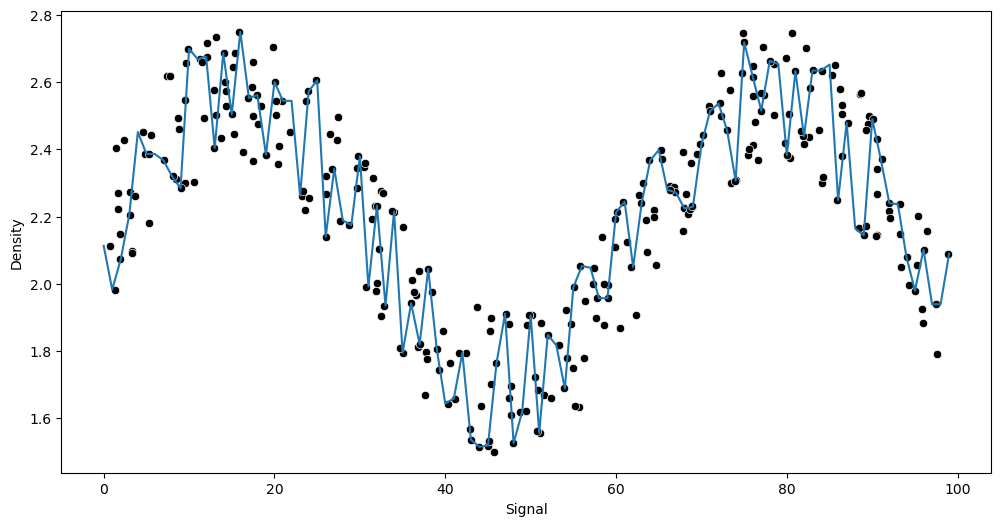

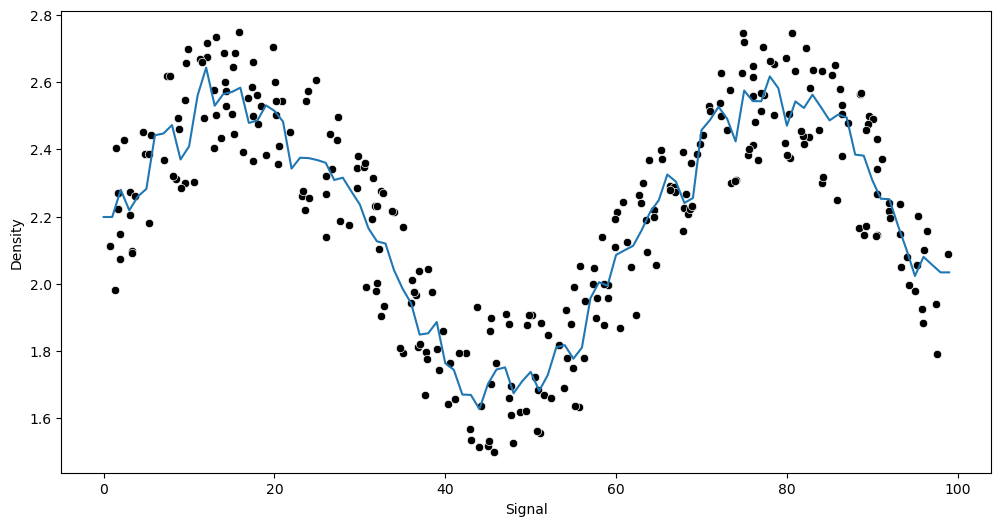

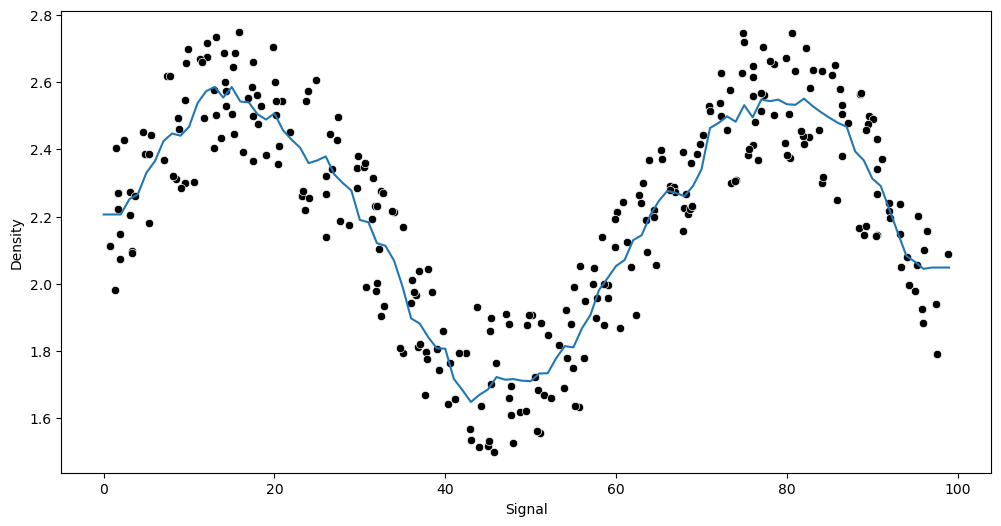

In [34]:
preds = {}
k_values = [1, 5, 10]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

---

# Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337


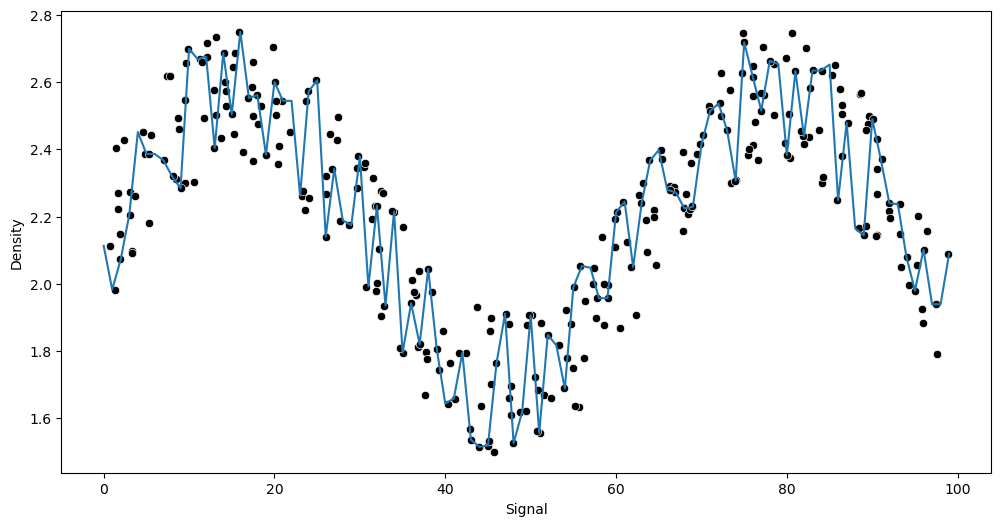

In [36]:
model = DecisionTreeRegressor()

run_model(model, X_train, y_train, X_test, y_test)

In [37]:
model.get_n_leaves()

270

---

# Support Vector Regression

In [38]:
from sklearn.svm import SVR

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [41]:
grid = GridSearchCV(svr, param_grid)

RMSE: 0.12646999302047557


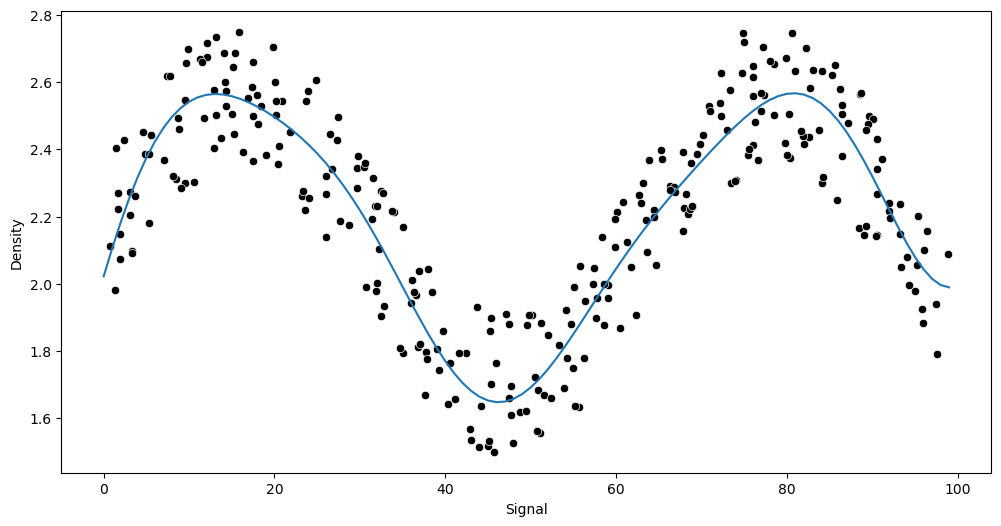

In [42]:
run_model(grid, X_train, y_train, X_test, y_test)

In [43]:
grid.best_estimator_

SVR(C=1000)

---

# Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

RMSE: 0.13139808130151223
RMSE: 0.1313776520864235
RMSE: 0.137926076061278


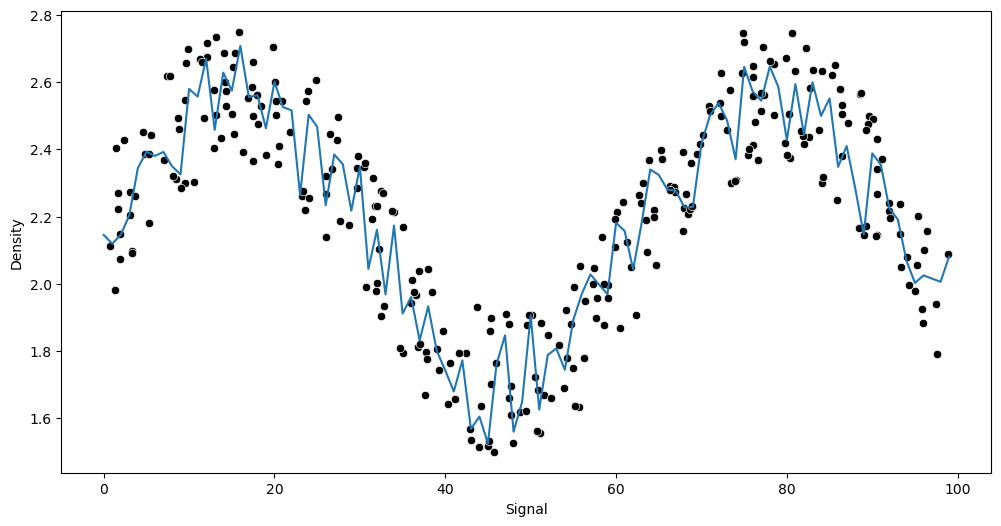

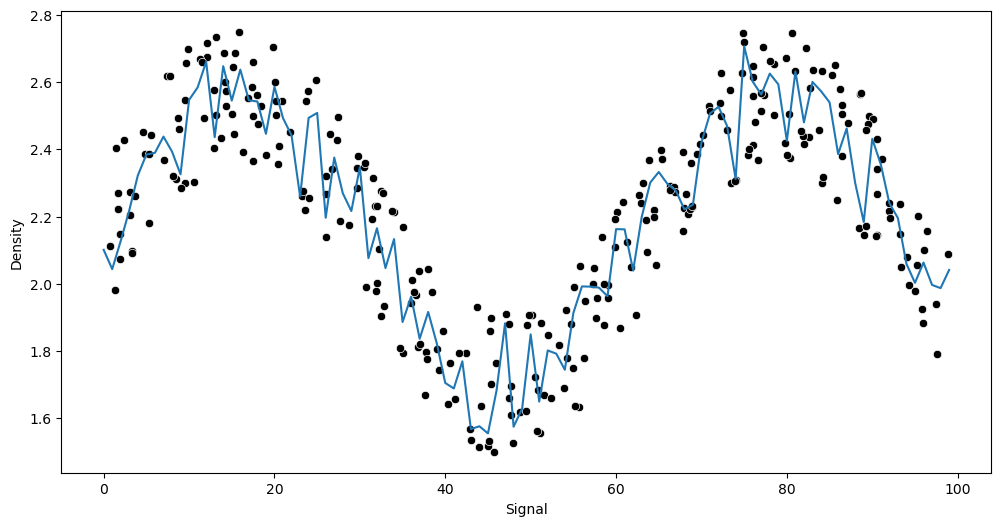

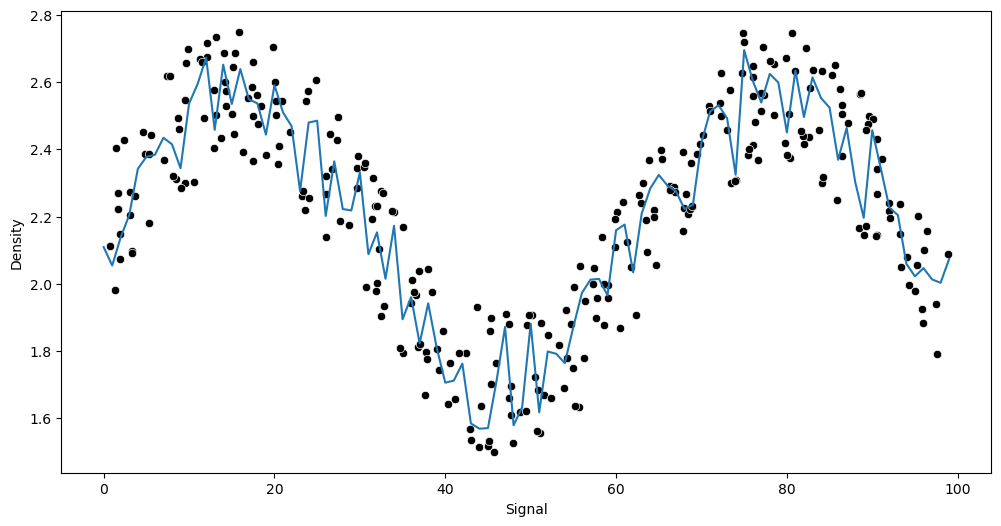

In [45]:
trees = [10, 50, 100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    run_model(model, X_train, y_train, X_test, y_test)

# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE: 0.13294148649584667


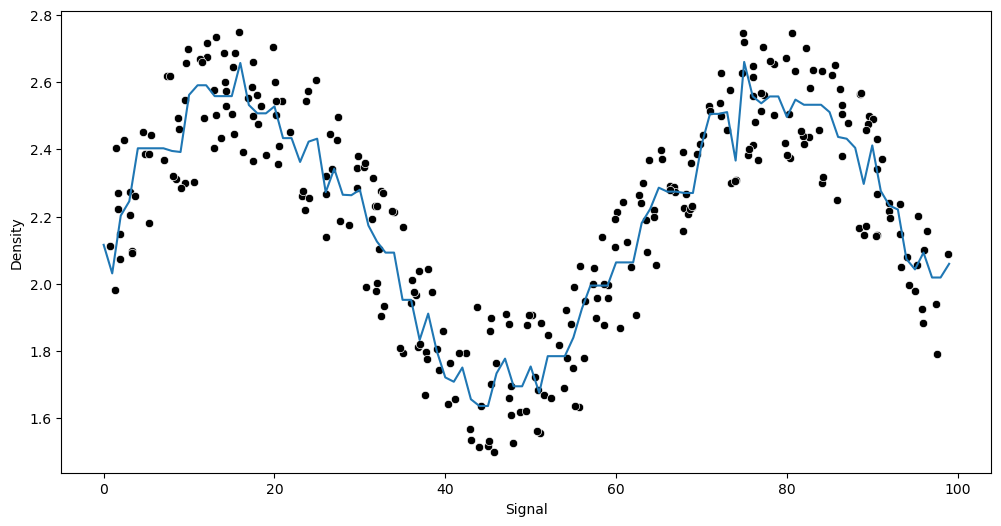

In [47]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

# Adaboost

In [48]:
from sklearn.ensemble import AdaBoostRegressor

RMSE: 0.130804005433277


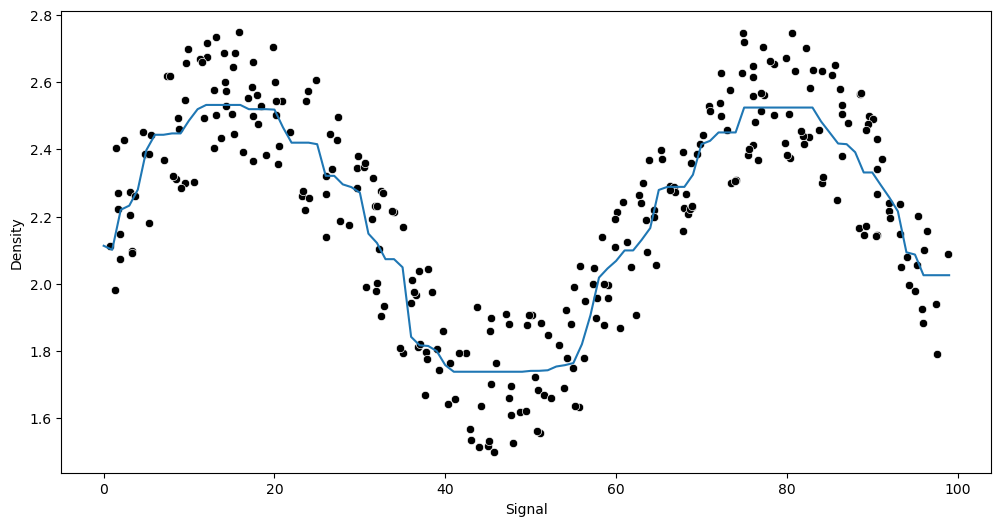

In [50]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)

---